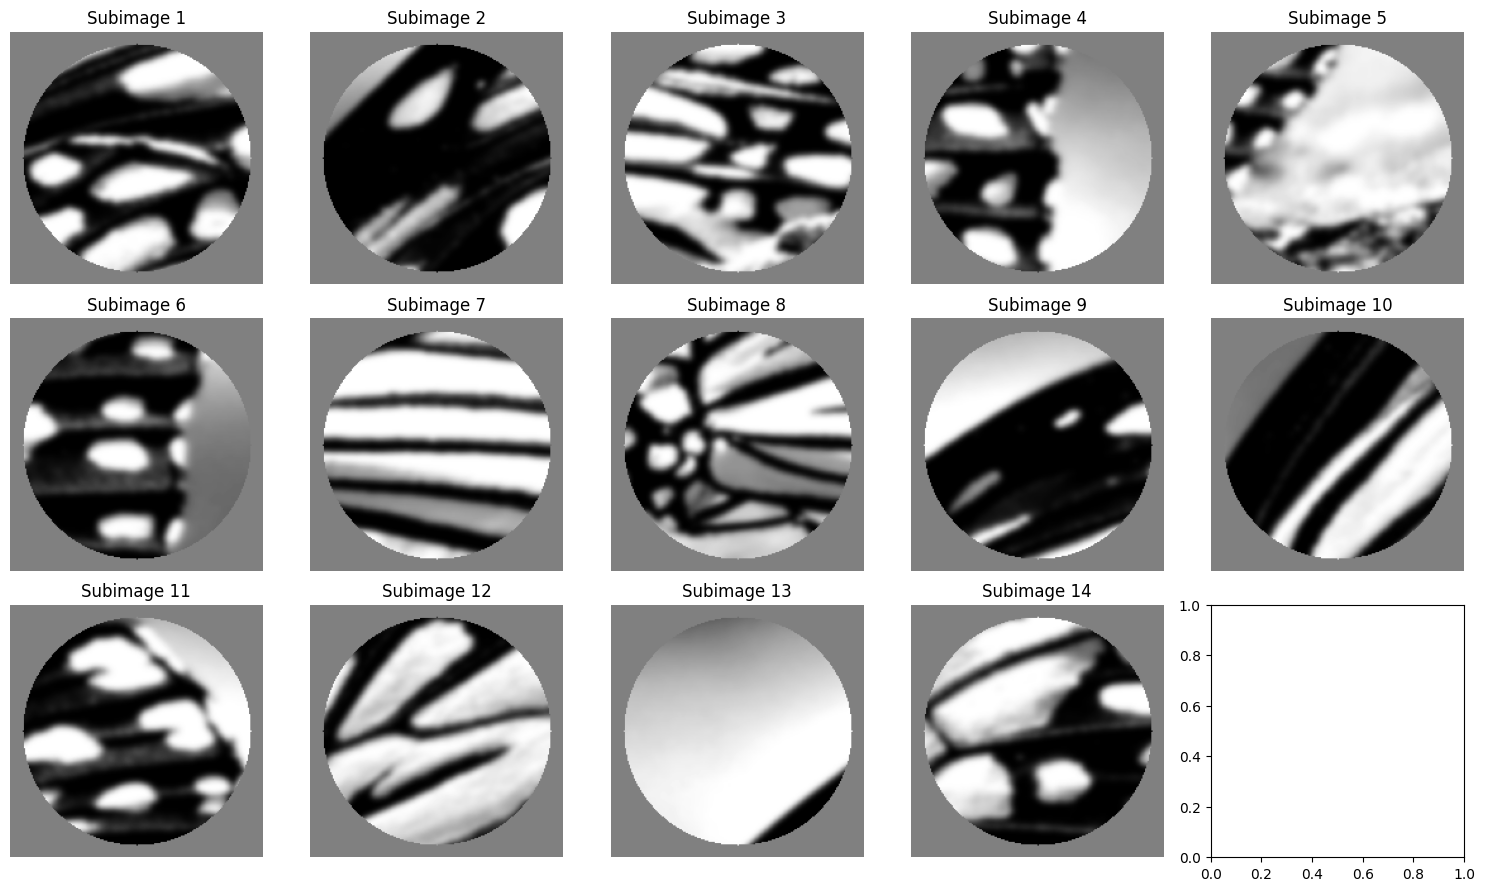

In [17]:
from PIL import Image
import os
import numpy as np

def calculate_entropy(image):
    histogram, _ = np.histogram(image.flatten(), bins=256, range=[0, 256])
    probabilities = histogram / sum(histogram)
    entropy = -sum(p * np.log2(p) for p in probabilities if p != 0)
    return entropy

def choose_high_entropy_subimage(subimages):
    entropies = [calculate_entropy(np.array(subimage)) for subimage in subimages]
    max_entropy_index = np.argmax(entropies)
    return subimages[max_entropy_index]

def divide_image(image_path, subimage_size):
    original_image = Image.open(image_path)
    width, height = original_image.size

    num_subimages = 16
    subimages = []

    for i in range(0, num_subimages):
        # Calculate the corner coordinates for each subimage
        top_left_x = (i % 4) * subimage_size
        top_left_y = (i // 4) * subimage_size
        bottom_right_x = top_left_x + subimage_size
        bottom_right_y = top_left_y + subimage_size

        # Crop the subimage from the original image
        subimage = original_image.crop((top_left_x, top_left_y, bottom_right_x, bottom_right_y))
        subimages.append(subimage)

    return subimages

# Specify the folder containing images
folder_path = "/content/drive/MyDrive/Colab Notebooks/Images/1/"

# List to store high entropy subimages for all images
high_entropy_subimages = []

# Loop through all images in the folder
for filename in os.listdir(folder_path):
    if filename.endswith(".png"):
        # Construct the full path to the image
        image_path = os.path.join(folder_path, filename)

        # Set the subimage size
        subimage_size = 200

        # Divide the image into subimages
        subimages = divide_image(image_path, subimage_size)

        # Choose the high entropy subimage
        high_entropy_subimage = choose_high_entropy_subimage(subimages)

        # Append the result to the list
        high_entropy_subimages.append(high_entropy_subimage)

# The list high_entropy_subimages now contains the high entropy subimages for all images in the specified folder


import matplotlib.pyplot as plt

# Set the size of the subplots
fig, axes = plt.subplots(3, 5, figsize=(15, 9))

# Plot all high entropy subimages
for i, (subimage, ax) in enumerate(zip(high_entropy_subimages, axes.flatten())):
    ax.imshow(subimage, cmap='gray')
    ax.axis('off')
    ax.set_title(f'Subimage {i+1}')

plt.tight_layout()
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


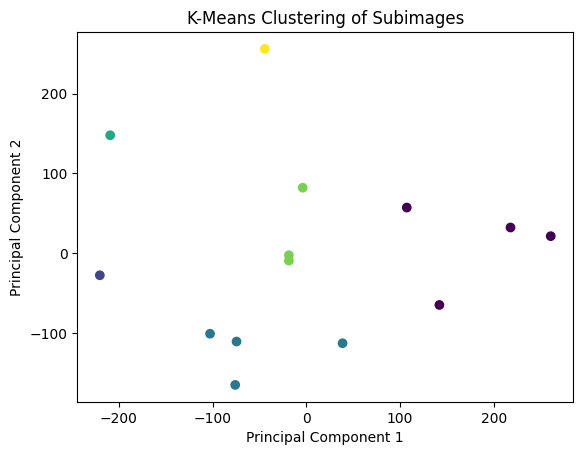

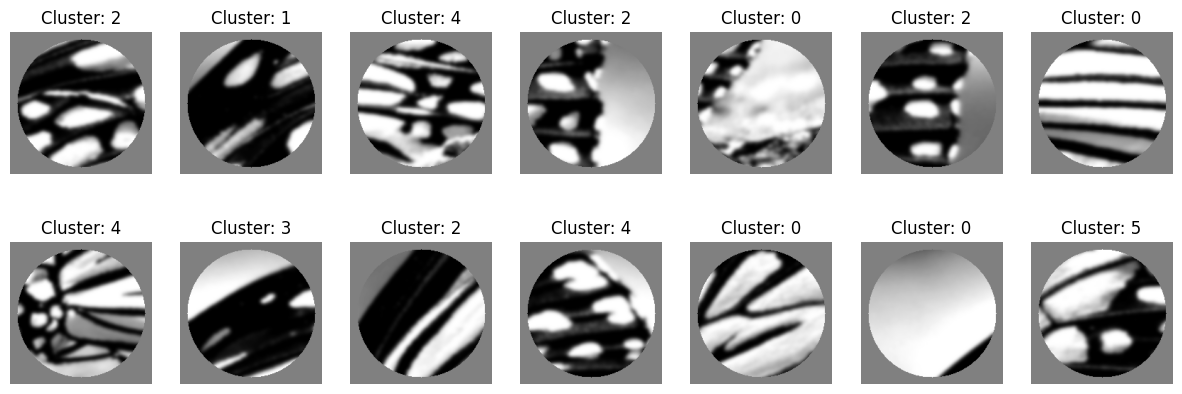

In [23]:
from PIL import Image
import os
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Load and preprocess high_entropy_subimages
flattened_subimages = [np.array(subimage).flatten() for subimage in high_entropy_subimages]

# Standardize the data
scaler = StandardScaler()
standardized_subimages = scaler.fit_transform(flattened_subimages)

# Apply PCA for dimensionality reduction
pca = PCA(n_components=2)
reduced_subimages = pca.fit_transform(standardized_subimages)

# Use K-Means clustering
kmeans = KMeans(n_clusters=6, random_state=42)  # Adjust the number of clusters as needed
clusters = kmeans.fit_predict(reduced_subimages)

# Visualize the results
plt.scatter(reduced_subimages[:, 0], reduced_subimages[:, 1], c=clusters, cmap='viridis')
plt.title('K-Means Clustering of Subimages')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

# Create a 2x7 figure (adjust the layout based on the number of subimages)
fig, axes = plt.subplots(2, 7, figsize=(15, 5))

# Flatten the axes array for easy indexing
axes = axes.flatten()

# Show each subimage in their respective clusters
for i, subimage in enumerate(high_entropy_subimages):
    cluster_label = clusters[i]

    axes[i].imshow(subimage, cmap='gray')
    axes[i].set_title(f'Cluster: {cluster_label}')
    axes[i].axis('off')

plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


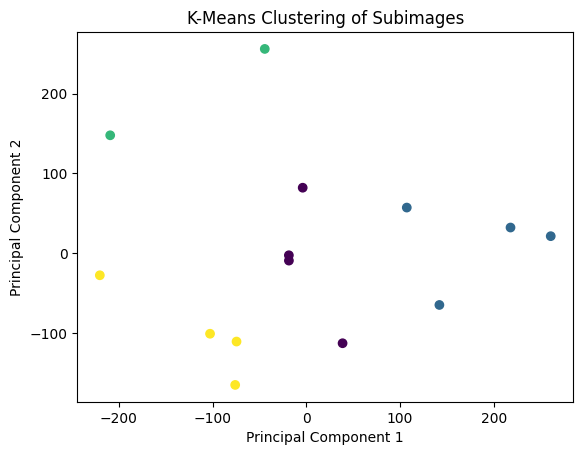

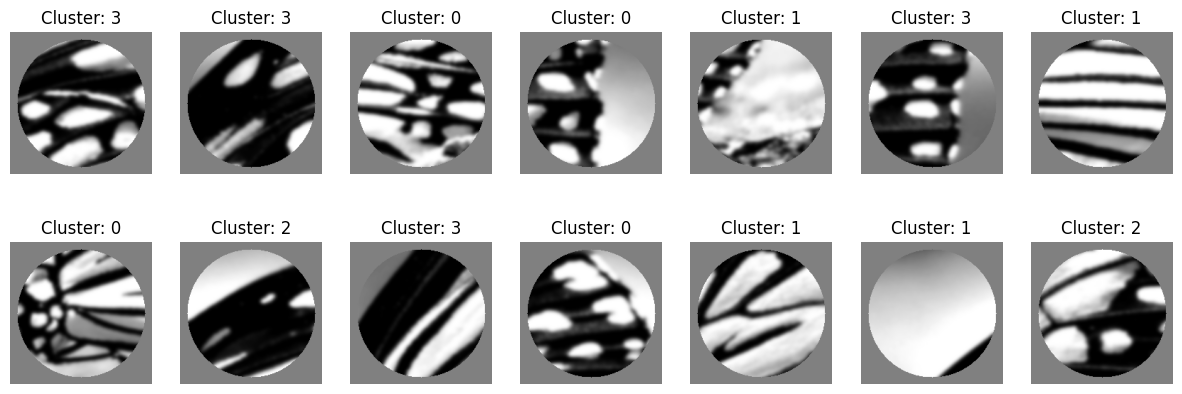

In [24]:
from PIL import Image
import os
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Load and preprocess high_entropy_subimages
flattened_subimages = [np.array(subimage).flatten() for subimage in high_entropy_subimages]

# Standardize the data
scaler = StandardScaler()
standardized_subimages = scaler.fit_transform(flattened_subimages)

# Apply PCA for dimensionality reduction
pca = PCA(n_components=2)
reduced_subimages = pca.fit_transform(standardized_subimages)

# Use K-Means clustering
kmeans = KMeans(n_clusters=4, random_state=42)  # Adjust the number of clusters as needed
clusters = kmeans.fit_predict(reduced_subimages)

# Visualize the results
plt.scatter(reduced_subimages[:, 0], reduced_subimages[:, 1], c=clusters, cmap='viridis')
plt.title('K-Means Clustering of Subimages')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

# Create a 2x7 figure (adjust the layout based on the number of subimages)
fig, axes = plt.subplots(2, 7, figsize=(15, 5))

# Flatten the axes array for easy indexing
axes = axes.flatten()

# Show each subimage in their respective clusters
for i, subimage in enumerate(high_entropy_subimages):
    cluster_label = clusters[i]

    axes[i].imshow(subimage, cmap='gray')
    axes[i].set_title(f'Cluster: {cluster_label}')
    axes[i].axis('off')

plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


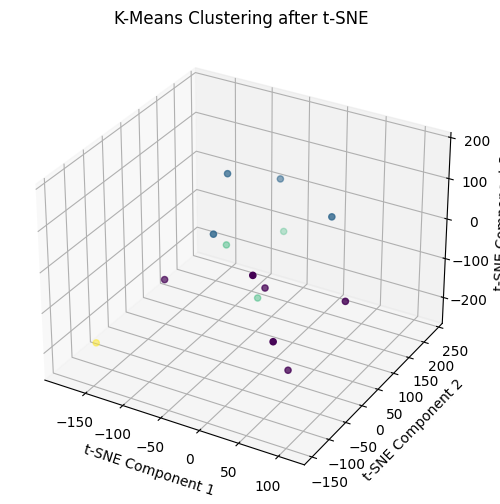

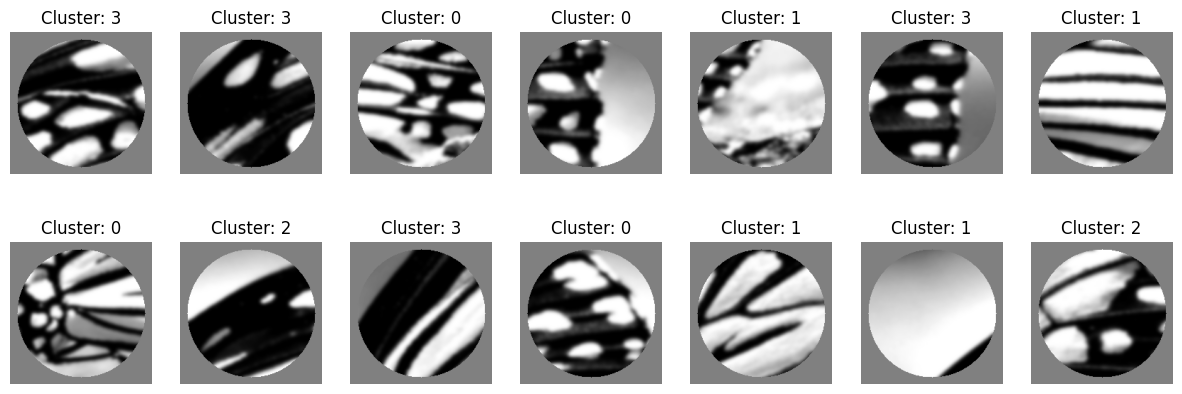

In [27]:
from PIL import Image
import os
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.manifold import TSNE


# Load and preprocess high_entropy_subimages
flattened_subimages = [np.array(subimage).flatten() for subimage in high_entropy_subimages]

# Standardize the data
scaler = StandardScaler()
standardized_subimages = scaler.fit_transform(flattened_subimages)

# Apply PCA for dimensionality reduction
pca = PCA(n_components=8)
reduced_subimages_pca = pca.fit_transform(standardized_subimages)

# Apply t-SNE for further dimensionality reduction
tsne = TSNE(n_components=3, perplexity=5, random_state=42)
final_subimage_features = tsne.fit_transform(reduced_subimages_pca)


# Use K-Means clustering on the final features
kmeans_final = KMeans(n_clusters=4, random_state=42)
clusters_final = kmeans_final.fit_predict(final_subimage_features)

# Visualize the results in 3D
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(final_subimage_features[:, 0], final_subimage_features[:, 1], final_subimage_features[:, 2],
           c=clusters_final, cmap='viridis')

ax.set_title('K-Means Clustering after t-SNE')
ax.set_xlabel('t-SNE Component 1')
ax.set_ylabel('t-SNE Component 2')
ax.set_zlabel('t-SNE Component 3')

plt.show()

# Create a 2x7 figure (adjust the layout based on the number of subimages)
fig, axes = plt.subplots(2, 7, figsize=(15, 5))

# Flatten the axes array for easy indexing
axes = axes.flatten()

# Show each subimage in their respective clusters
for i, subimage in enumerate(high_entropy_subimages):
    cluster_label = clusters[i]

    axes[i].imshow(subimage, cmap='gray')
    axes[i].set_title(f'Cluster: {cluster_label}')
    axes[i].axis('off')

plt.show()

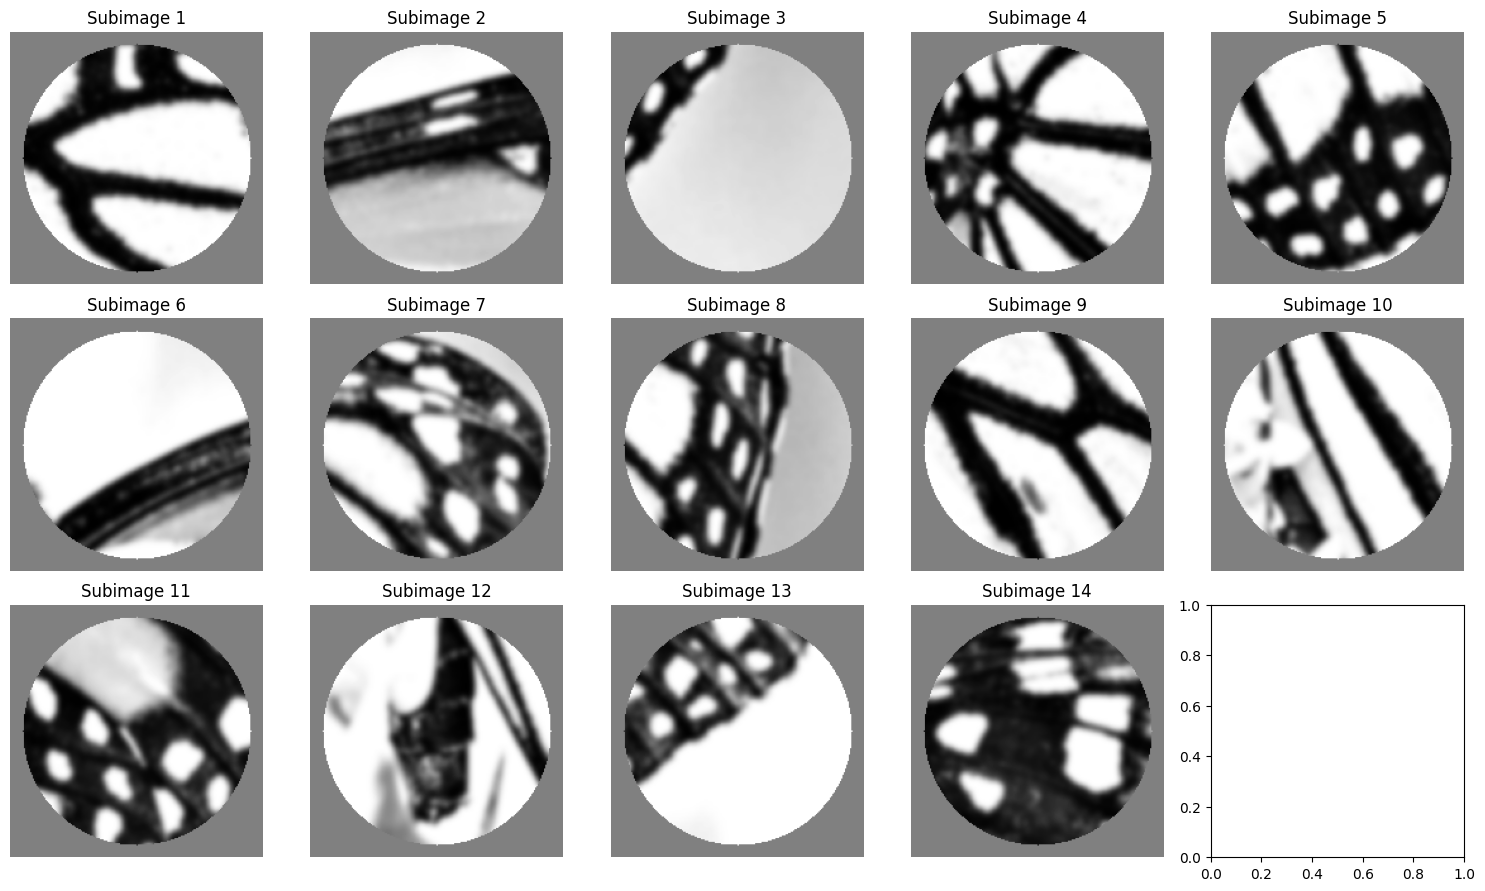

In [28]:
from PIL import Image
import os
import numpy as np

def calculate_entropy(image):
    histogram, _ = np.histogram(image.flatten(), bins=256, range=[0, 256])
    probabilities = histogram / sum(histogram)
    entropy = -sum(p * np.log2(p) for p in probabilities if p != 0)
    return entropy

def choose_high_entropy_subimage(subimages):
    entropies = [calculate_entropy(np.array(subimage)) for subimage in subimages]
    max_entropy_index = np.argmax(entropies)
    return subimages[max_entropy_index]

def divide_image(image_path, subimage_size):
    original_image = Image.open(image_path)
    width, height = original_image.size

    num_subimages = 16
    subimages = []

    for i in range(0, num_subimages):
        # Calculate the corner coordinates for each subimage
        top_left_x = (i % 4) * subimage_size
        top_left_y = (i // 4) * subimage_size
        bottom_right_x = top_left_x + subimage_size
        bottom_right_y = top_left_y + subimage_size

        # Crop the subimage from the original image
        subimage = original_image.crop((top_left_x, top_left_y, bottom_right_x, bottom_right_y))
        subimages.append(subimage)

    return subimages

# Specify the folder containing images
folder_path = "/content/drive/MyDrive/Colab Notebooks/Images/5/"

# List to store high entropy subimages for all images
high_entropy_subimages = []

# Loop through all images in the folder
for filename in os.listdir(folder_path):
    if filename.endswith(".png"):
        # Construct the full path to the image
        image_path = os.path.join(folder_path, filename)

        # Set the subimage size
        subimage_size = 200

        # Divide the image into subimages
        subimages = divide_image(image_path, subimage_size)

        # Choose the high entropy subimage
        high_entropy_subimage = choose_high_entropy_subimage(subimages)

        # Append the result to the list
        high_entropy_subimages.append(high_entropy_subimage)

# The list high_entropy_subimages now contains the high entropy subimages for all images in the specified folder


import matplotlib.pyplot as plt

# Set the size of the subplots
fig, axes = plt.subplots(3, 5, figsize=(15, 9))

# Plot all high entropy subimages
for i, (subimage, ax) in enumerate(zip(high_entropy_subimages, axes.flatten())):
    ax.imshow(subimage, cmap='gray')
    ax.axis('off')
    ax.set_title(f'Subimage {i+1}')

plt.tight_layout()
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


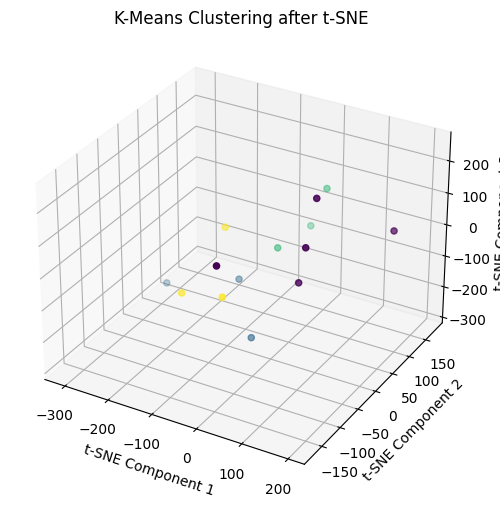

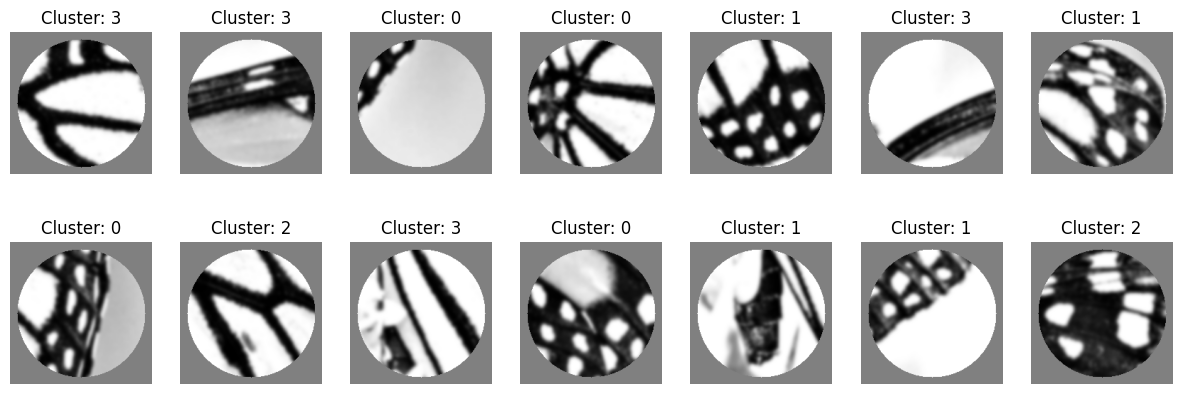

In [29]:
from PIL import Image
import os
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.manifold import TSNE


# Load and preprocess high_entropy_subimages
flattened_subimages = [np.array(subimage).flatten() for subimage in high_entropy_subimages]

# Standardize the data
scaler = StandardScaler()
standardized_subimages = scaler.fit_transform(flattened_subimages)

# Apply PCA for dimensionality reduction
pca = PCA(n_components=8)
reduced_subimages_pca = pca.fit_transform(standardized_subimages)

# Apply t-SNE for further dimensionality reduction
tsne = TSNE(n_components=3, perplexity=5, random_state=42)
final_subimage_features = tsne.fit_transform(reduced_subimages_pca)


# Use K-Means clustering on the final features
kmeans_final = KMeans(n_clusters=4, random_state=42)
clusters_final = kmeans_final.fit_predict(final_subimage_features)

# Visualize the results in 3D
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(final_subimage_features[:, 0], final_subimage_features[:, 1], final_subimage_features[:, 2],
           c=clusters_final, cmap='viridis')

ax.set_title('K-Means Clustering after t-SNE')
ax.set_xlabel('t-SNE Component 1')
ax.set_ylabel('t-SNE Component 2')
ax.set_zlabel('t-SNE Component 3')

plt.show()

# Create a 2x7 figure (adjust the layout based on the number of subimages)
fig, axes = plt.subplots(2, 7, figsize=(15, 5))

# Flatten the axes array for easy indexing
axes = axes.flatten()

# Show each subimage in their respective clusters
for i, subimage in enumerate(high_entropy_subimages):
    cluster_label = clusters[i]

    axes[i].imshow(subimage, cmap='gray')
    axes[i].set_title(f'Cluster: {cluster_label}')
    axes[i].axis('off')

plt.show()